In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
        
len(cities)

623

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list
for i in range (len(cities)):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | codrington
Processing Record 2 of Set 13 | innisfail
Processing Record 3 of Set 13 | busselton
Processing Record 4 of Set 13 | temaraia
City not found. Skipping...
Processing Record 5 of Set 13 | barrow
Processing Record 6 of Set 13 | kashi
Processing Record 7 of Set 13 | tasiilaq
Processing Record 8 of Set 13 | ushuaia
Processing Record 9 of Set 13 | mugla
Processing Record 10 of Set 13 | carnarvon
Processing Record 11 of Set 13 | nizhneyansk
City not found. Skipping...
Processing Record 12 of Set 13 | harper
Processing Record 13 of Set 13 | petropavlovsk-kamchatskiy
Processing Record 14 of Set 13 | isangel
Processing Record 15 of Set 13 | kaitangata
Processing Record 16 of Set 13 | atuona
Processing Record 17 of Set 13 | canavieiras
Processing Record 18 of Set 13 | albany
Processing Record 19 of Set 13 | rikitea
Processing Record 20 of Set 13 | soto la marina
Processing Record 21 of Set 13 | onega
Processing Record 22 of Set 13 | taolanaro
City not fou

Processing Record 34 of Set 16 | ulaanbaatar
Processing Record 35 of Set 16 | xinzhou
Processing Record 36 of Set 16 | ahipara
Processing Record 37 of Set 16 | avarua
Processing Record 38 of Set 16 | comodoro rivadavia
Processing Record 39 of Set 16 | van wert
Processing Record 40 of Set 16 | peleduy
Processing Record 41 of Set 16 | lebu
Processing Record 42 of Set 16 | saleaula
City not found. Skipping...
Processing Record 43 of Set 16 | petropavlovka
Processing Record 44 of Set 16 | marcona
City not found. Skipping...
Processing Record 45 of Set 16 | la plata
Processing Record 46 of Set 16 | luancheng
Processing Record 47 of Set 16 | ganzhou
Processing Record 48 of Set 16 | panji
Processing Record 49 of Set 16 | lolua
City not found. Skipping...
Processing Record 50 of Set 16 | te anau
Processing Record 1 of Set 17 | christchurch
Processing Record 2 of Set 17 | ndele
Processing Record 3 of Set 17 | wanning
Processing Record 4 of Set 17 | mount isa
Processing Record 5 of Set 17 | axim

Processing Record 16 of Set 20 | erzin
Processing Record 17 of Set 20 | banda aceh
Processing Record 18 of Set 20 | cockburn harbour
City not found. Skipping...
Processing Record 19 of Set 20 | yar
Processing Record 20 of Set 20 | namatanai
Processing Record 21 of Set 20 | zhigansk
Processing Record 22 of Set 20 | kenai
Processing Record 23 of Set 20 | makung
City not found. Skipping...
Processing Record 24 of Set 20 | hobyo
Processing Record 25 of Set 20 | daxian
City not found. Skipping...
Processing Record 26 of Set 20 | maragogi
Processing Record 27 of Set 20 | la union
Processing Record 28 of Set 20 | kazalinsk
City not found. Skipping...
Processing Record 29 of Set 20 | yar-sale
Processing Record 30 of Set 20 | kampot
Processing Record 31 of Set 20 | vaitupu
City not found. Skipping...
Processing Record 32 of Set 20 | tabuk
Processing Record 33 of Set 20 | mackenzie
Processing Record 34 of Set 20 | saint-malo
Processing Record 35 of Set 20 | garowe
Processing Record 36 of Set 20 

Processing Record 1 of Set 24 | bathsheba
Processing Record 2 of Set 24 | aykhal
Processing Record 3 of Set 24 | diffa
Processing Record 4 of Set 24 | muisne
Processing Record 5 of Set 24 | izacic
Processing Record 6 of Set 24 | waingapu
Processing Record 7 of Set 24 | anzoategui
Processing Record 8 of Set 24 | santa isabel do rio negro
Processing Record 9 of Set 24 | yinchuan
Processing Record 10 of Set 24 | atambua
Processing Record 11 of Set 24 | kamenka
Processing Record 12 of Set 24 | punto fijo
Processing Record 13 of Set 24 | karratha
Processing Record 14 of Set 24 | ankang
Processing Record 15 of Set 24 | tacarigua
Processing Record 16 of Set 24 | kirovsk
Processing Record 17 of Set 24 | salmas
Processing Record 18 of Set 24 | kholm
Processing Record 19 of Set 24 | rocky mountain house
Processing Record 20 of Set 24 | kardamaina
Processing Record 21 of Set 24 | santa vitoria do palmar
Processing Record 22 of Set 24 | leh
Processing Record 23 of Set 24 | isiro
Processing Record 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Codrington,-38.27,141.97,55.69,84,62,7.92,AU,2020-10-27 21:42:56
1,Innisfail,-17.53,146.03,75.70,79,100,2.24,AU,2020-10-27 21:42:56
2,Busselton,-33.65,115.33,53.01,97,17,7.29,AU,2020-10-27 21:42:56
3,Barrow,71.29,-156.79,30.20,68,90,16.11,US,2020-10-27 21:42:56
4,Kashi,39.45,75.98,48.20,36,0,8.95,CN,2020-10-27 21:42:56
5,Tasiilaq,65.61,-37.64,35.60,34,100,13.87,GL,2020-10-27 21:42:56
6,Ushuaia,-54.80,-68.30,46.40,42,20,11.41,AR,2020-10-27 21:40:43
7,Mugla,37.23,28.36,60.80,82,0,4.70,TR,2020-10-27 21:42:56
8,Carnarvon,-24.87,113.63,66.20,88,0,19.46,AU,2020-10-27 21:42:56
9,Harper,4.38,-7.72,78.26,88,49,8.25,LR,2020-10-27 21:42:57


In [13]:
columns = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[columns]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Codrington,AU,2020-10-27 21:42:56,-38.27,141.97,55.69,84,62,7.92
1,Innisfail,AU,2020-10-27 21:42:56,-17.53,146.03,75.70,79,100,2.24
2,Busselton,AU,2020-10-27 21:42:56,-33.65,115.33,53.01,97,17,7.29
3,Barrow,US,2020-10-27 21:42:56,71.29,-156.79,30.20,68,90,16.11
4,Kashi,CN,2020-10-27 21:42:56,39.45,75.98,48.20,36,0,8.95
5,Tasiilaq,GL,2020-10-27 21:42:56,65.61,-37.64,35.60,34,100,13.87
6,Ushuaia,AR,2020-10-27 21:40:43,-54.80,-68.30,46.40,42,20,11.41
7,Mugla,TR,2020-10-27 21:42:56,37.23,28.36,60.80,82,0,4.70
8,Carnarvon,AU,2020-10-27 21:42:56,-24.87,113.63,66.20,88,0,19.46
9,Harper,LR,2020-10-27 21:42:57,4.38,-7.72,78.26,88,49,8.25


In [14]:
# Create a new output file (CSV)
output_data_file = 'weather_data/cities.csv'

# Export city data into a csv
city_data_df.to_csv(output_data_file, index_label='City ID')

In [15]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [16]:
import time

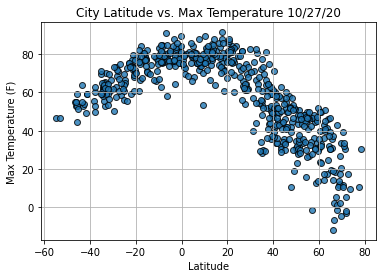

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

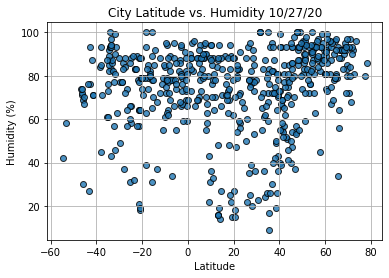

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

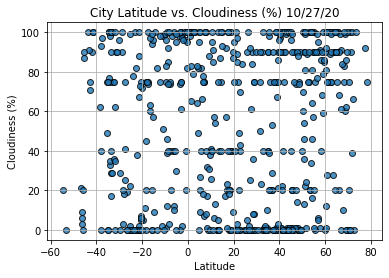

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

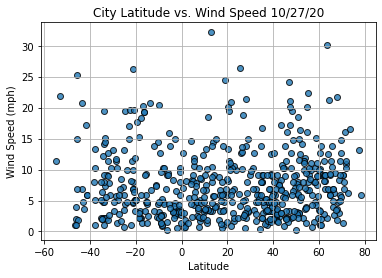

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [32]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [43]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [44]:
index13 = city_data_df.loc[13]
index13

City                       Atuona
Country                        PF
Date          2020-10-27 21:42:57
Lat                          -9.8
Lng                       -139.03
Max Temp                    78.96
Humidity                       72
Cloudiness                      1
Wind Speed                   20.4
Name: 13, dtype: object

In [45]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4       True
       ...  
562     True
563    False
564     True
565     True
566    False
Name: Lat, Length: 567, dtype: bool

In [46]:
city_data_df.loc[city_data_df["Lat"] >= 0]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Barrow,US,2020-10-27 21:42:56,71.29,-156.79,30.20,68,90,16.11
4,Kashi,CN,2020-10-27 21:42:56,39.45,75.98,48.20,36,0,8.95
5,Tasiilaq,GL,2020-10-27 21:42:56,65.61,-37.64,35.60,34,100,13.87
7,Mugla,TR,2020-10-27 21:42:56,37.23,28.36,60.80,82,0,4.70
9,Harper,LR,2020-10-27 21:42:57,4.38,-7.72,78.26,88,49,8.25
...,...,...,...,...,...,...,...,...,...
560,Topolobampo,MX,2020-10-27 21:44:02,25.60,-109.05,79.00,22,5,26.40
561,Hofn,IS,2020-10-27 21:44:02,64.25,-15.21,37.40,79,100,21.27
562,Tupik,RU,2020-10-27 21:44:02,54.43,119.93,15.91,91,81,3.74
564,Mulege,MX,2020-10-27 21:44:02,26.88,-111.98,72.73,35,0,18.84


In [47]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

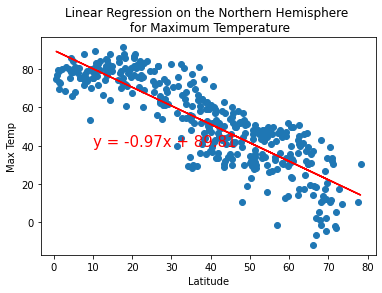

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

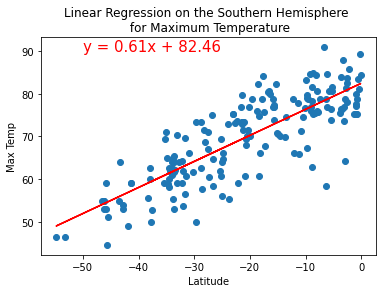

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

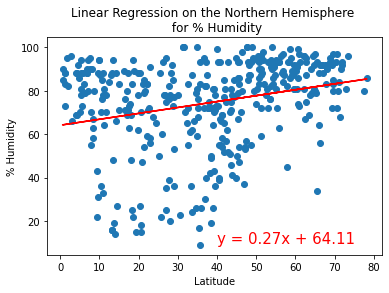

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

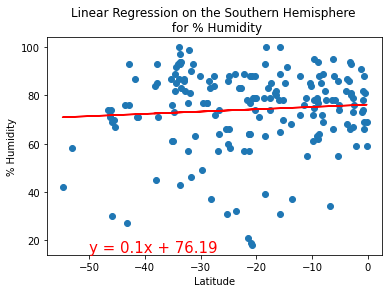

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

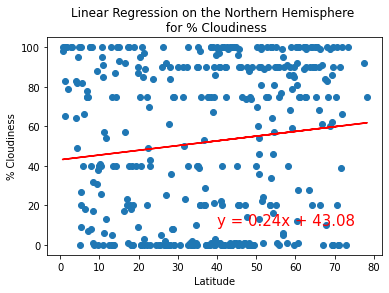

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

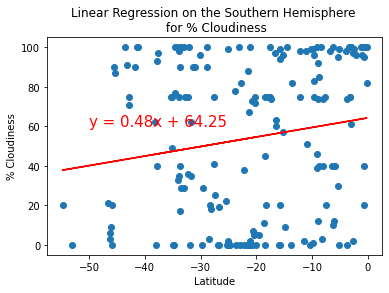

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness', (-50,60))

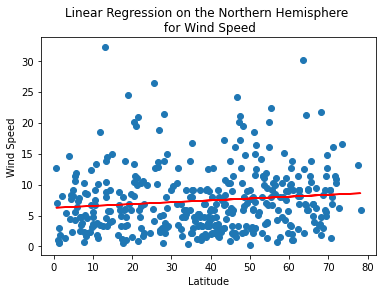

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

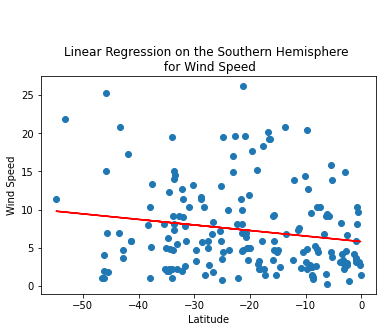

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))